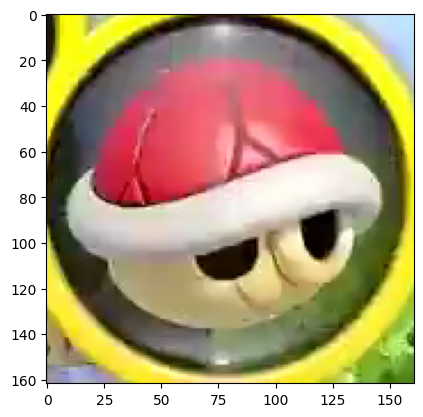

In [1]:
import matplotlib.pyplot as plt
import cv2

image = cv2.imread('/Users/shingkai/code/personal-projects/mk8/race_videos/training/mirror_flower_cup/p1_first_item/0/001825.png')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [3]:
from enum import Enum

class Item(int, Enum):
    BANANA = 1
    TRIPLE_BANANA = 2
    GREEN_SHELL = 3
    TRIPLE_GREEN_SHELL = 4
    RED_SHELL = 5
    TRIPLE_RED_SHELL = 6
    BLUE_SHELL = 7
    BOB_OMB = 8
    MUSHROOM = 9
    TRIPLE_MUSHROOM = 10
    GOLDEN_MUSHROOM = 11
    BULLET_BILL = 12
    BLOOPER = 13
    LIGHTNING = 14
    STAR = 15
    FIRE_FLOWER = 16
    BOOMERANG = 17
    PIRANHA_PLANT = 18
    SUPER_HORN = 19
    CRAZY_EIGHT = 20
    COIN = 21
    FEATHER = 22
    BOO = 23
    NONE = 24

In [ ]:
GREEN_SHELL : {[(3510,4002)]}
RED_SHELL : {[(1825,1955)]}
COIN : {[(2693,2860),(3443,3483)]}


In [8]:
import os
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def load_images(folder_path):
    images = []
    file_paths = []
    for filename in os.listdir(folder_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            file_path = os.path.join(folder_path, filename)
            try:
                img = Image.open(file_path).convert('RGB')
                img = img.resize((100, 100))  # Resize for consistency
                images.append(img)
                file_paths.append(file_path)
            except Exception as e:
                print(f"Error processing {filename}: {str(e)}")
    return images, file_paths

def extract_features(images):
    features = []
    for img in images:
        hist = img.histogram()
        features.append(hist)
    return np.array(features)

def cluster_images(folder_path, n_clusters):
    # Load images
    print("Loading images...")
    images, file_paths = load_images(folder_path)
    
    # Extract features
    print("Extracting features...")
    features = extract_features(images)
    
    # Normalize features
    scaler = StandardScaler()
    normalized_features = scaler.fit_transform(features)
    
    # Perform K-means clustering
    print("Clustering images...")
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(normalized_features)
    
    # Organize images into clusters
    clusters = {i: [] for i in range(n_clusters)}
    for file_path, label in zip(file_paths, cluster_labels):
        clusters[label].append(file_path)
    
    # Print results
    for cluster, files in clusters.items():
        print(f"Cluster {cluster}: {len(files)} images")
        # Optionally, you can print file names or move files to cluster-specific folders here
    
    return clusters
    


In [54]:
folder_path = "/Users/shingkai/code/personal-projects/mk8/race_videos/training/mirror_flower_cup/p1_first_item/0/"
n_clusters = 50
clustered_images = cluster_images(folder_path, n_clusters)

Loading images...
Extracting features...
Clustering images...
Cluster 0: 2389 images
Cluster 1: 882 images
Cluster 2: 1196 images
Cluster 3: 2215 images
Cluster 4: 3245 images
Cluster 5: 1876 images
Cluster 6: 190 images
Cluster 7: 362 images
Cluster 8: 2089 images
Cluster 9: 1227 images
Cluster 10: 323 images
Cluster 11: 556 images
Cluster 12: 391 images
Cluster 13: 352 images
Cluster 14: 1756 images
Cluster 15: 259 images
Cluster 16: 477 images
Cluster 17: 393 images
Cluster 18: 4744 images
Cluster 19: 302 images
Cluster 20: 620 images
Cluster 21: 193 images
Cluster 22: 1053 images
Cluster 23: 147 images
Cluster 24: 400 images
Cluster 25: 262 images
Cluster 26: 82 images
Cluster 27: 291 images
Cluster 28: 235 images
Cluster 29: 618 images
Cluster 30: 194 images
Cluster 31: 407 images
Cluster 32: 232 images
Cluster 33: 90 images
Cluster 34: 427 images
Cluster 35: 389 images
Cluster 36: 119 images
Cluster 37: 334 images
Cluster 38: 40 images
Cluster 39: 77 images
Cluster 40: 556 images

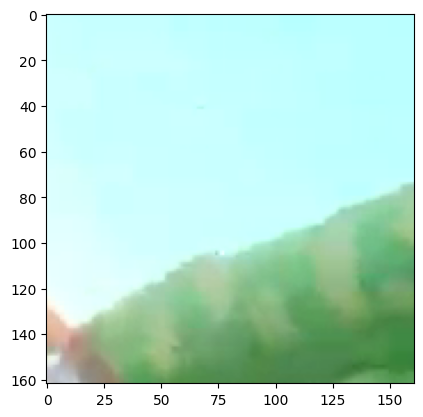

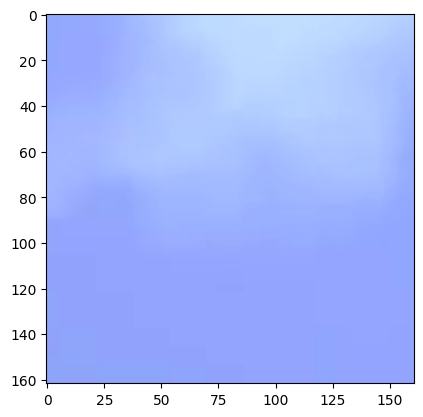

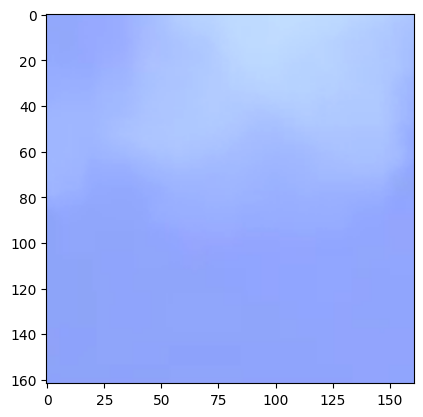

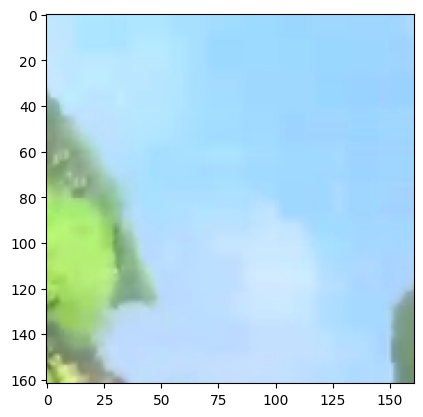

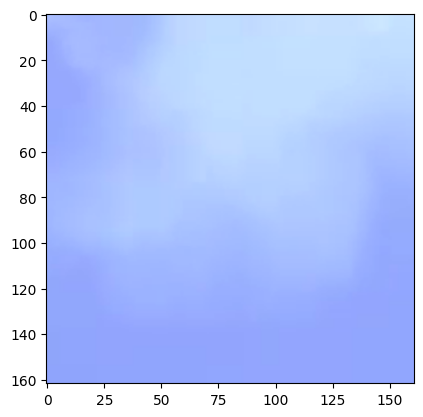

In [57]:
for image in clustered_images[2][:5]:
    plt.figure()
    plt.imshow(cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB))
    plt.show()

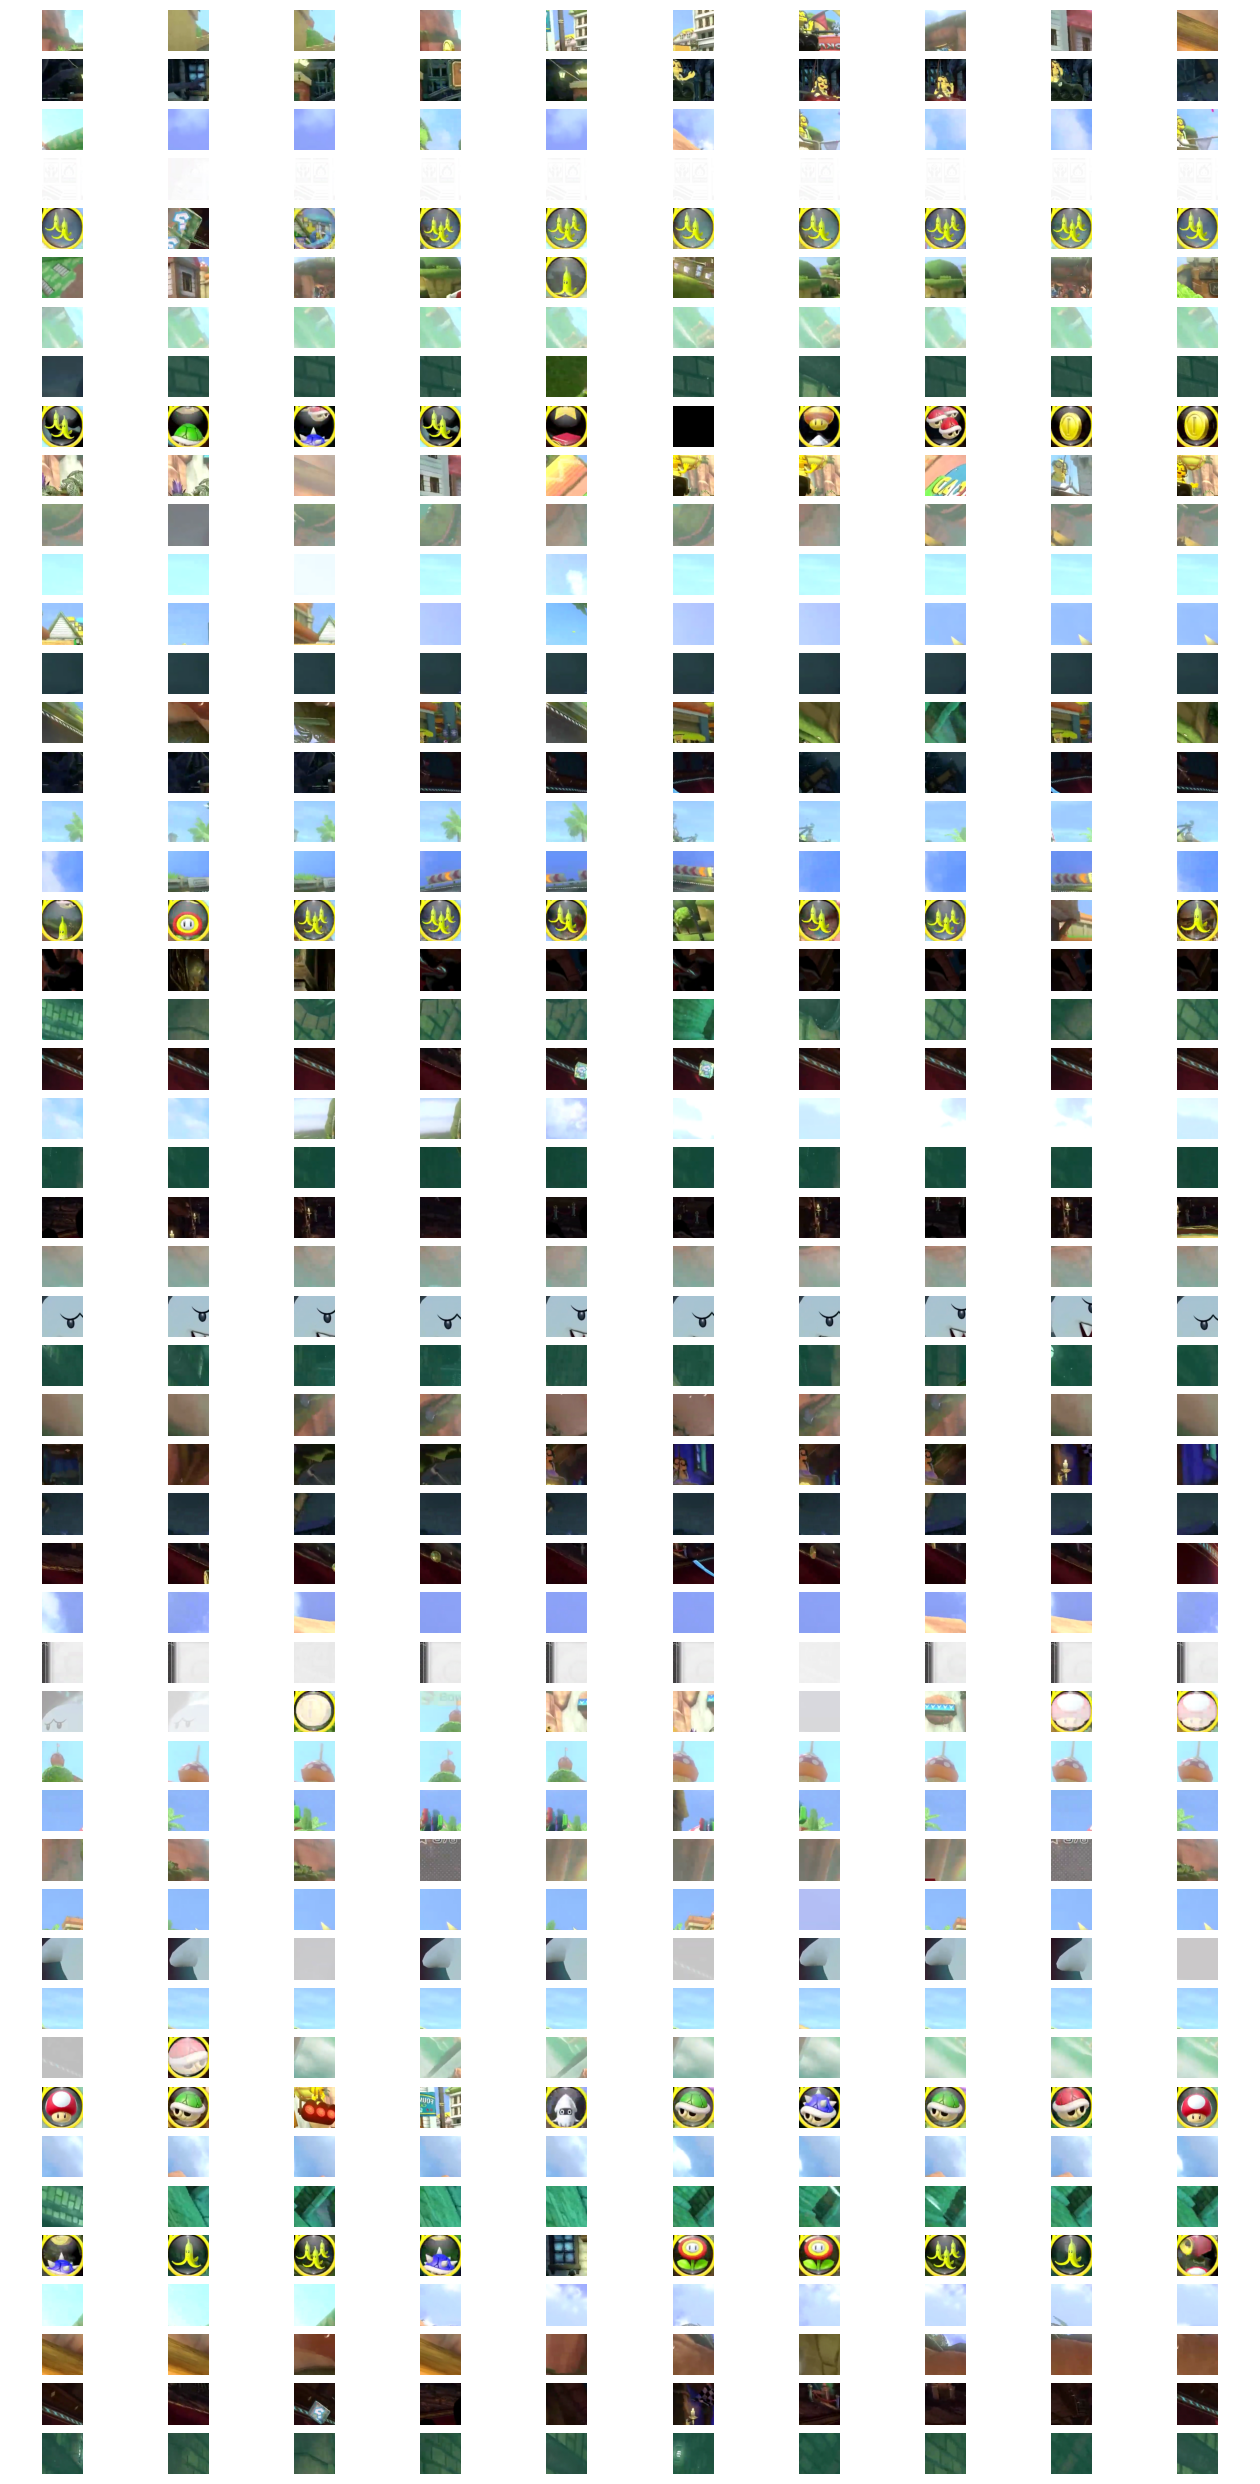

In [69]:
plt.subplots(figsize=(16, 64))
plt.axis('off')

for i in range(50):
    for j in range(10):
        plt.subplot(50,10,i*10+j+1)
        plt.axis('off')
        plt.imshow(cv2.cvtColor(cv2.imread(clustered_images[i][j]), cv2.COLOR_BGR2RGB))

plt.show()

In [71]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, random_split
import time
import copy

# Check if GPU is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Define transformations for the dataset (same for train and validation initially)
data_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Set the directory path where the dataset is stored (single directory with subdirectories for each class)
data_dir = '/Users/shingkai/code/personal-projects/mk8/training_data/items'

# Load the dataset from the directory
full_dataset = datasets.ImageFolder(root=data_dir, transform=data_transforms)

# Split the dataset into train and validation sets (e.g., 80% train, 20% validation)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Create dataloaders for train and validation sets
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# Dictionary to hold the dataloaders
dataloaders = {
    'train': train_loader,
    'val': val_loader
}

# Sizes of the datasets
dataset_sizes = {
    'train': len(train_dataset),
    'val': len(val_dataset)
}

# Class names (same as subdirectory names)
class_names = full_dataset.classes

# Load the pretrained VGG16 model
model = models.vgg16(pretrained=True)

# Freeze all layers in the network except the final classifier layer
for param in model.parameters():
    param.requires_grad = False

# Modify the classifier to fit our dataset (assuming the number of classes is determined by the dataset)
num_features = model.classifier[6].in_features
model.classifier[6] = nn.Linear(num_features, len(class_names))

# Move the model to the appropriate device
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.classifier.parameters(), lr=0.001, momentum=0.9)

# Learning rate scheduler to decrease learning rate by a factor of 0.1 every 7 epochs
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Train the model
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward pass
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Backward pass + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Track loss and accuracy
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            # Adjust learning rate
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # Deep copy the model if it has improved
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:.4f}')

    # Load the best model weights
    model.load_state_dict(best_model_wts)
    return model



/Users/shingkai/code/personal-projects/mk8/MarioKart8CV/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/shingkai/code/personal-projects/mk8/MarioKart8CV/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/shingkai/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100.0%


In [ ]:
# Train the model
num_epochs = 25
best_model = train_model(model, criterion, optimizer, scheduler, num_epochs)

# Save the trained model
torch.save(best_model.state_dict(), 'best_model_vgg16.pth')

Epoch 0/24
----------
train Loss: 0.2731 Acc: 0.9182
val Loss: 0.0729 Acc: 0.9831

Epoch 1/24
----------
